<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np

class ScratchKMeans():

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):


        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):

        pass
        return

In [18]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [19]:
import numpy as np

class ScratchKMeans():

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X):
        # 【問題1】中心点の初期値を決める
        self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()

        # 【問題5】繰り返し
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)

            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))

    #【問題2】SSEを求める関数の作成
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2) #ベクトルの距離（ノルム）計算＊末尾のクラスタを除いた数値を使用している
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    #【問題3】クラスタへの割り当て
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

    #【問題4】中心点の移動
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

    #【問題7】推定
    def predict(self, X):
      y_pred = np.zeros(len(X))
      for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
      return y_pred

メモ：【問題2】SSEを求める関数の作成

SSE (Sum of Squared Errors) は、統計的手法の一つで、以下のような差の合計を測定するために使用される
達成された値の実際の値からの下記の式が定義できる

$\sum_{i=1}^{n} d^{2}$

d はデータとクラスタ中心との距離
二乗誤差の和(SSE)は、得られたデータ間の差を測定するために使用される式

In [20]:
# 【問題6】異なる初期値で計算

class ScratchKMeans2():
    def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False, tol=1e-4):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.tol = tol # Assign tol to the class attribute
        self.best_sse = 10**20

    def fit(self, X):
        # 【問題1】中心点の初期値を決める
        self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()

        # 【問題5】繰り返し
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)

            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))

    #【問題2】SSEを求める関数の作成
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2) #ベクトルの距離（ノルム）計算＊末尾のクラスタを除いた数値を使用している
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    #【問題3】クラスタへの割り当て
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

    #【問題4】中心点の移動
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

    #【問題7】推定
    def predict(self, X):
      y_pred = np.zeros(len(X))
      for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
      return y_pred

#実行

In [21]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# 訓練データとテストデータに分割
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

In [22]:
# 学習
max_iter = 100
clf = ScratchKMeans2(n_clusters=4,n_init=5,n_iter=max_iter,verbose=True)
clf.fit(X_train)


初期化：0　学習回数：0　最善のSSE：2643.7647694382044
初期化：0　学習回数：1　最善のSSE：278.5570972070227
初期化：0　学習回数：2　最善のSSE：256.133744442928
初期化：0　学習回数：3　最善のSSE：203.28714260799842
初期化：0　学習回数：4　最善のSSE：198.34489427999492
初期化：0　学習回数：5　最善のSSE：193.9242550737204
初期化：0　学習回数：6　最善のSSE：167.0003457908951
初期化：0　学習回数：7　最善のSSE：101.1138674124831
初期化：0　学習回数：8　最善のSSE：101.1138674124831
初期化：0　学習回数：9　最善のSSE：101.1138674124831
初期化：0　学習回数：10　最善のSSE：101.1138674124831
初期化：0　学習回数：11　最善のSSE：101.1138674124831
初期化：0　学習回数：12　最善のSSE：101.1138674124831
初期化：0　学習回数：13　最善のSSE：101.1138674124831
初期化：0　学習回数：14　最善のSSE：101.1138674124831
初期化：0　学習回数：15　最善のSSE：101.1138674124831
初期化：0　学習回数：16　最善のSSE：101.1138674124831
初期化：0　学習回数：17　最善のSSE：101.1138674124831
初期化：0　学習回数：18　最善のSSE：101.1138674124831
初期化：0　学習回数：19　最善のSSE：101.1138674124831
初期化：0　学習回数：20　最善のSSE：101.1138674124831
初期化：0　学習回数：21　最善のSSE：101.1138674124831
初期化：0　学習回数：22　最善のSSE：101.1138674124831
初期化：0　学習回数：23　最善のSSE：101.1138674124831
初期化：0　学習回数：24　最善のSSE：101.1138674124831
初期化：0　学習回数：25　最善のSSE：101.1138674

In [23]:
pred = clf.predict(X_valid)

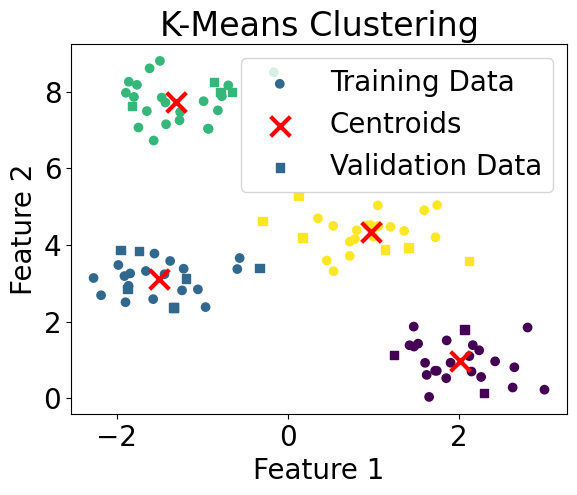

In [24]:
# 図示

import matplotlib.pyplot as plt

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=clf.predict(X_train), cmap='viridis', label='Training Data')

# Plot the centroids
plt.scatter(clf.record_myu[:, 0], clf.record_myu[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')


# Plot the validation data points with predictions
plt.scatter(X_valid[:, 0], X_valid[:, 1], c=pred, cmap='viridis', marker='s', label='Validation Data')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

##【問題8】エルボー法の実装

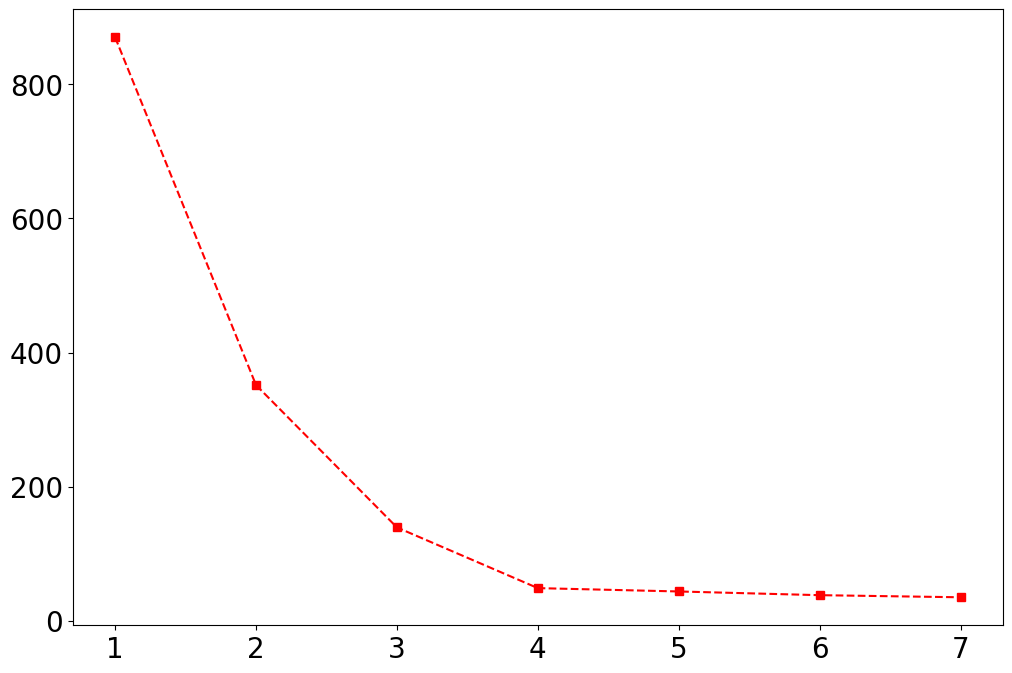

In [25]:
elbow = {}

for k in range(1,8):
    # Provide a value for 'tol' when instantiating ScratchKMeans
    # Use 'n_iter' instead of 'max_iter'
    model = ScratchKMeans2(n_clusters=k, n_init=5, n_iter=100, verbose=False, tol=1e-4)  # Changed 'max_iter' to 'n_iter'
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

##【問題9】シルエット図

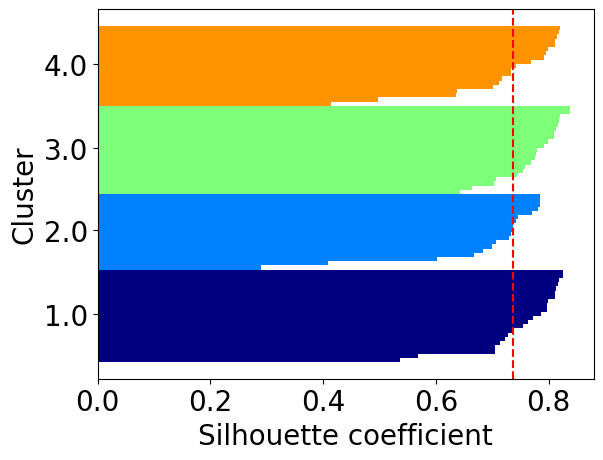

In [26]:
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming 'clf' is your clustering model and 'X_train' is your training data
cluster_labels = clf.predict(X_train)  # Get cluster assignments
n_clusters = clf.record_cluster  # Get the number of clusters

# Calculate silhouette values
silhouette_avg = silhouette_score(X_train, cluster_labels)
silhouette_vals = silhouette_samples(X_train, cluster_labels)

# Assuming 'y_km' should represent cluster assignments, use the calculated 'cluster_labels'
y_km = cluster_labels

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(np.unique(cluster_labels)): # Use unique cluster labels
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  # Ensure float division
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, np.unique(cluster_labels) + 1) # Use unique cluster labels
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [27]:
import pandas as pd
data = pd.read_csv("/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


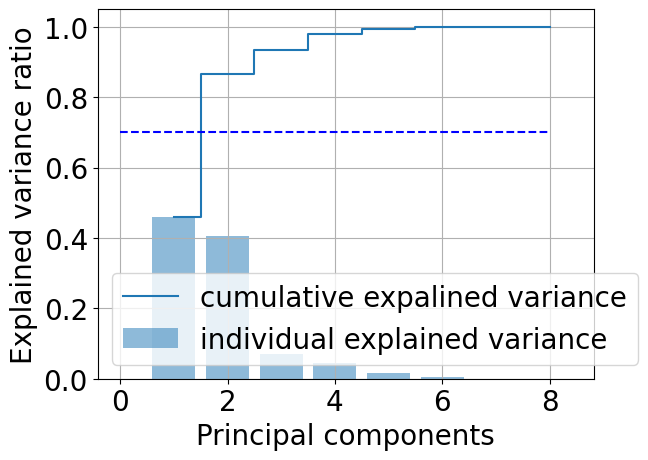

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)


num_components = len(var_exp)
plt.bar(range(1, num_components + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, num_components + 1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, num_components,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

##【問題10】クラスタ数ｋの選択

エルボー法の「肘」にあたる、減少が緩やかな値が3であること、またシルエットが長い値も3であることから、$k$ = 3　が適当と考えられる。

##【問題11】既知のグループとの比較

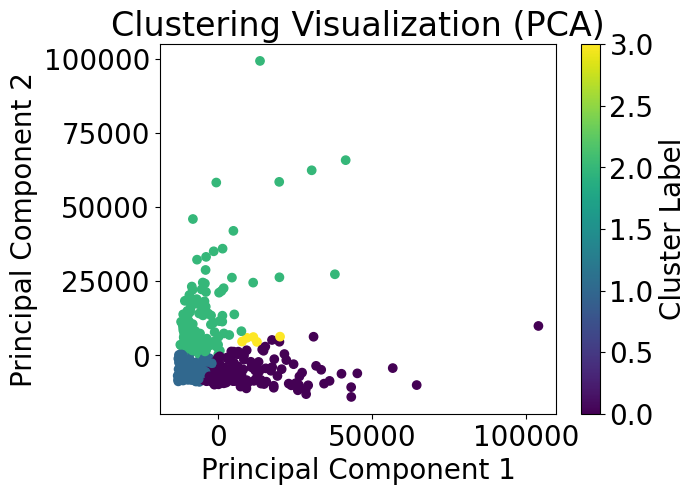

In [30]:
# Regionを可視化する

import matplotlib.pyplot as plt

# Predict clusters for the PCA-transformed data
cluster_labels = clf.predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering Visualization (PCA)")
plt.colorbar(label="Cluster Label")
plt.show()

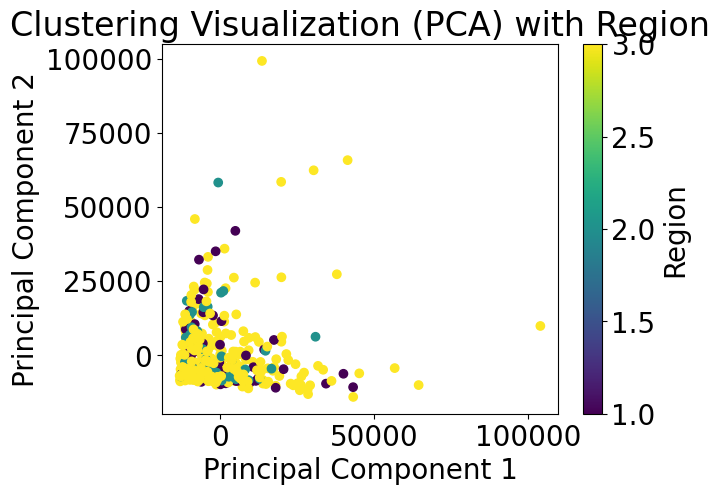

In [31]:
# channelを可視化する

# Predict clusters for the PCA-transformed data
cluster_labels = clf.predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Region'], cmap='viridis') # Use 'Region' for color
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering Visualization (PCA) with Region")
plt.colorbar(label="Region")
plt.show()

既知のグループのRegionとChannelは、データ収集時に既に分類されている。

* Region: 地理的な地域（Lisbon, Porto, Other）。

* Channel: 顧客の業種（Horeca（ホテル/レストラン/カフェ）とRetail）。

そのグループ分けも、人間の判断や事前のドメイン知識に基づいたものである。

一方、K-meansで得られるクラスタは、データの特徴量に基づいてクラスタを形成している。クラスタは事前に定義されていないため、未知のパターンを発見するための探索的手法で、数学的な距離で最適なクラスタリングを行っている。

---
K-meansで得られていたクラスタの図では、各グループごとにまとまって散在していた一方、RegionやChannelでは左下部に集中しており、一致度が低い。K-meansでは既存のグループを類似した形で識別できないことが分かる。

##【問題12】卸売業者にとって有益な情報

##クラスタごとの全体像を把握し、特徴的な消費傾向を特定する

In [32]:
# Wholesale customers Data Setの元データから、各クラスタごとに主要な特徴量の平均値・中央値・分散を算出

import pandas as pd

# Load the dataset
data = pd.read_csv("/Wholesale customers data.csv")

# Assuming 'clf' and 'data_pca' are defined from the previous code
# Predict clusters
cluster_labels = clf.predict(data_pca)

# Add cluster labels to the original DataFrame
data['cluster'] = cluster_labels

# Calculate statistics for each cluster
cluster_stats = {}
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    stats = {}
    for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']: # Example features
        stats[col] = {
            'mean': cluster_data[col].mean(),
            'median': cluster_data[col].median(),
            'variance': cluster_data[col].var()
        }
    cluster_stats[cluster] = stats

# Print or further process the cluster statistics
for cluster, stats in cluster_stats.items():
    print(f"Cluster {cluster}:")
    for col, col_stats in stats.items():
        print(f"  {col}: Mean={col_stats['mean']:.2f}, Median={col_stats['median']:.2f}, Variance={col_stats['variance']:.2f}")

Cluster 2.0:
  Fresh: Mean=6265.71, Median=4456.00, Variance=52523558.43
  Milk: Mean=12353.69, Median=9347.00, Variance=106419229.33
  Grocery: Mean=17868.58, Median=14403.00, Variance=151260254.72
  Frozen: Mean=1909.51, Median=993.00, Variance=12721320.43
  Detergents_Paper: Mean=7745.39, Median=6506.00, Variance=42263779.46
  Delicassen: Mean=2272.82, Median=1393.00, Variance=21986589.05
Cluster 0.0:
  Fresh: Mean=21790.61, Median=17771.50, Variance=190523409.12
  Milk: Mean=3364.41, Median=2306.00, Variance=11837284.41
  Grocery: Mean=4177.84, Median=3090.00, Variance=10670815.36
  Frozen: Mean=4480.55, Median=2536.00, Variance=39929418.93
  Detergents_Paper: Mean=817.18, Median=429.50, Variance=995683.56
  Delicassen: Mean=1458.95, Median=977.50, Variance=2680639.91
Cluster 1.0:
  Fresh: Mean=4288.70, Median=3952.00, Variance=8151019.41
  Milk: Mean=2625.16, Median=1991.50, Variance=4125193.09
  Grocery: Mean=3223.54, Median=2550.50, Variance=4372470.88
  Frozen: Mean=2304.71, Me

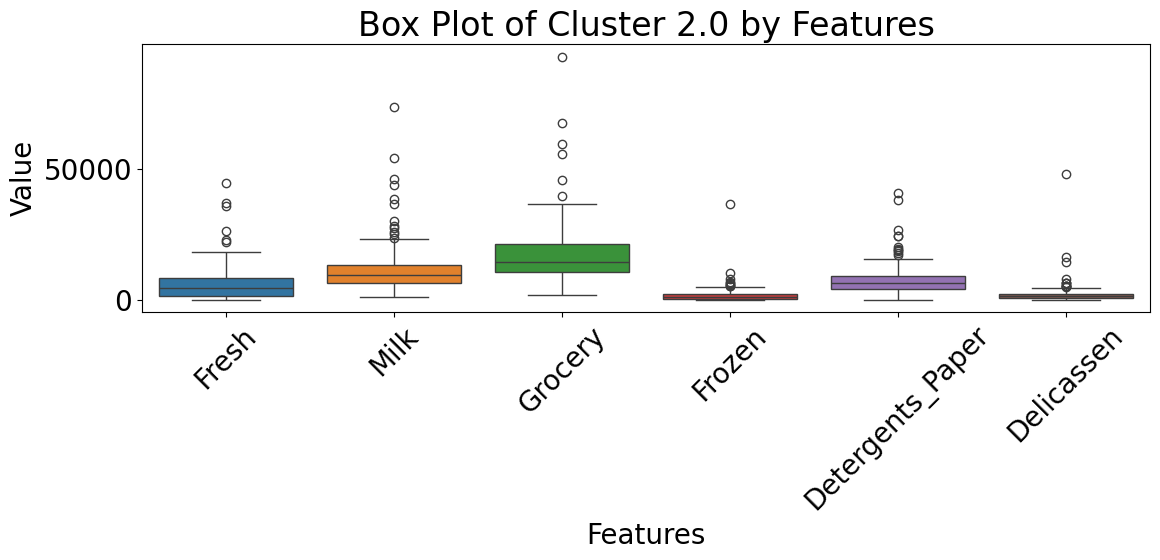

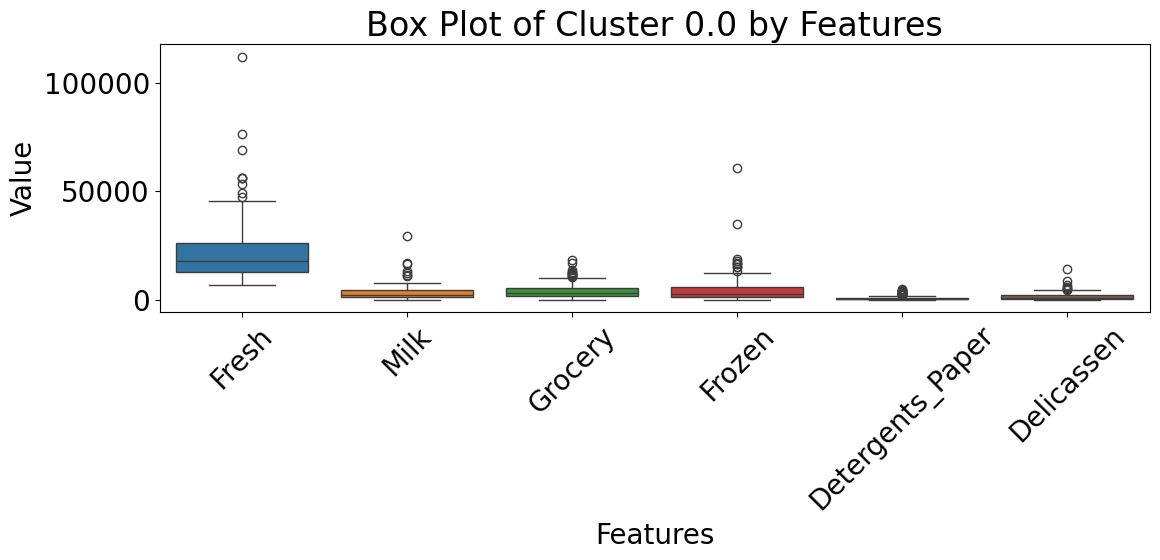

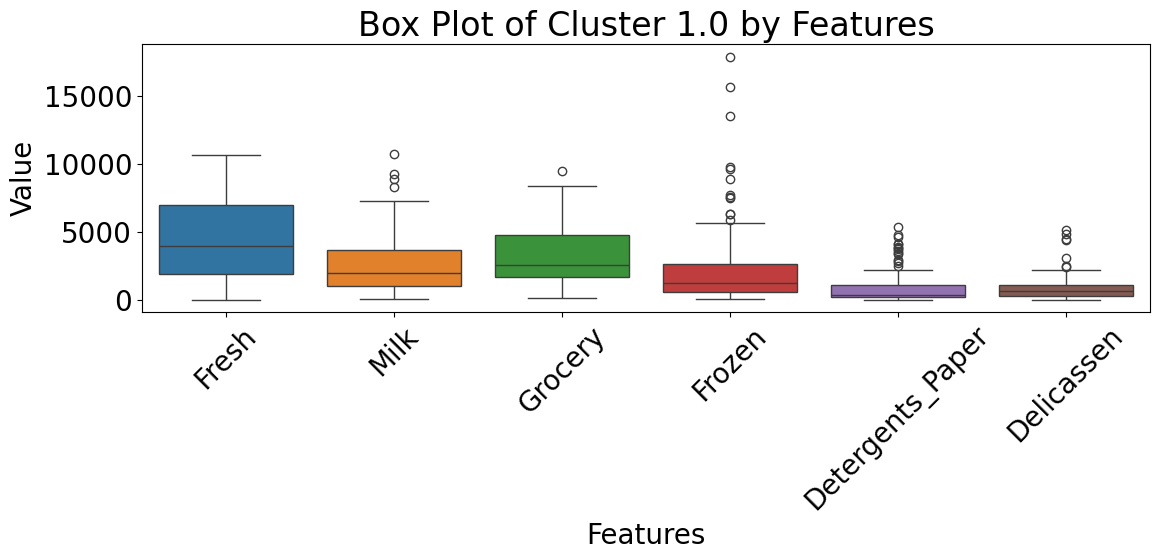

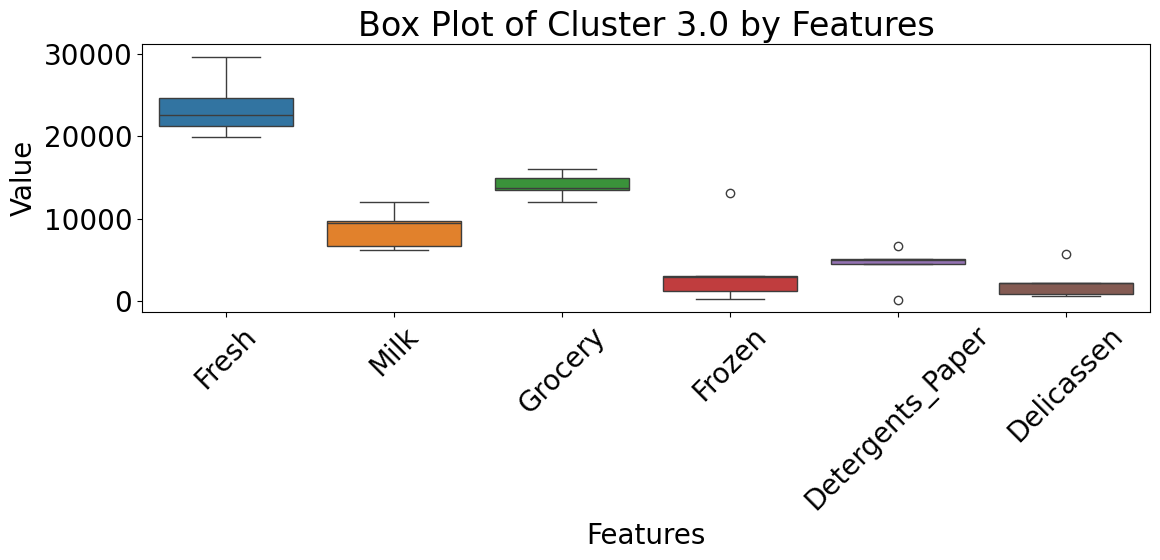

In [38]:
# x軸が各特徴量（Fresh, milk, grocery, frozen, detergents, delicassen）の箱ひげ図をかく

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' and 'cluster_stats' are defined from the previous code

for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
    sns.boxplot(data=cluster_data[features])
    plt.title(f'Box Plot of Cluster {cluster} by Features')
    plt.xlabel('Features')
    plt.ylabel('Value')
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

クラスタ2.0を除くそれぞれのクラスタにおいて、Freshの分散が最も大きく、次いでGroceryも大きい傾向はあるが、他の特徴量と比較して大きな差はない。
クラスタ2.0は特殊で、Groceryの分散が最も大きい。さらに、クラスタ0.0と2.0は、1.0, 3.0と比較して、全体的な購入価格が大きく、y軸のオーダーが大きい。

##どのクラスタがどの種類の商品に強い関心を持っているかを特定する

In [42]:
# 各クラスタの特徴量を全データセットの平均値と比較する

import pandas as pd

data = pd.read_csv("/Wholesale customers data.csv")

cluster_labels = clf.predict(data_pca)

data['cluster'] = cluster_labels

# Calculate the mean of each feature for the entire dataset
overall_means = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

# Calculate the mean of each feature for each cluster
cluster_means = data.groupby('cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

# Compare cluster means to overall means and find significantly higher/lower features
significant_features = {}
for cluster in cluster_means.index:
    significant_features[cluster] = {}
    for feature in cluster_means.columns:
        cluster_mean = cluster_means.loc[cluster, feature]
        overall_mean = overall_means[feature]

        threshold = 1.5 * overall_mean
        if cluster_mean > threshold:
            significant_features[cluster][feature] = "significantly higher"
        elif cluster_mean < overall_mean / 1.5:
            significant_features[cluster][feature] = "significantly lower"


for cluster, features in significant_features.items():
    print(f"Cluster {cluster}:")
    for feature, significance in features.items():
        print(f"  {feature}: {significance}")

Cluster 0.0:
  Fresh: significantly higher
  Milk: significantly lower
  Grocery: significantly lower
  Detergents_Paper: significantly lower
Cluster 1.0:
  Fresh: significantly lower
  Milk: significantly lower
  Grocery: significantly lower
  Detergents_Paper: significantly lower
  Delicassen: significantly lower
Cluster 2.0:
  Fresh: significantly lower
  Milk: significantly higher
  Grocery: significantly higher
  Frozen: significantly lower
  Detergents_Paper: significantly higher
Cluster 3.0:
  Fresh: significantly higher
  Milk: significantly higher
  Grocery: significantly higher
  Delicassen: significantly higher


Cluster0.0 : Freshに強い関心を持っている

Cluster1.0：全体的に購入が少ない

Cluster2.0 ：FreshとFrozenに関心が低い、全体的に購入が多い

Cluster3.0 ：全体的に購入が多い

##大口購入者や、特異な購入傾向を持つ顧客を特定する

In [43]:
# 各クラスタ内で、総購入額が高い顧客を特定する

import pandas as pd

cluster_labels = clf.predict(data_pca)
data['cluster'] = cluster_labels

# Function to identify high-spending customers within each cluster
def find_high_spenders(cluster_data):
    # Calculate total spending per customer
    cluster_data['TotalSpending'] = cluster_data.iloc[:, 1:7].sum(axis=1)

    # Find the customer with the highest total spending
    high_spender = cluster_data.loc[cluster_data['TotalSpending'].idxmax()]

    return high_spender


# Analyze each cluster
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    high_spender = find_high_spenders(cluster_data)

    print(f"Cluster {cluster}:")
    print(f"  High-Spending Customer: {high_spender.to_string()}")
    print("-" * 20)

Cluster 2.0:
  High-Spending Customer: Channel                  2.0
Region                   3.0
Fresh                16117.0
Milk                 46197.0
Grocery              92780.0
Frozen                1026.0
Detergents_Paper     40827.0
Delicassen            2944.0
cluster                  2.0
TotalSpending       196950.0
--------------------
Cluster 0.0:
  High-Spending Customer: Channel                  1.0
Region                   3.0
Fresh               112151.0
Milk                 29627.0
Grocery              18148.0
Frozen               16745.0
Detergents_Paper      4948.0
Delicassen            8550.0
cluster                  0.0
TotalSpending       181622.0
--------------------
Cluster 1.0:
  High-Spending Customer: Channel                 1.0
Region                  3.0
Fresh                4983.0
Milk                 4859.0
Grocery              6633.0
Frozen              17866.0
Detergents_Paper      912.0
Delicassen           2435.0
cluster                 1.0
TotalSpen

<ipython-input-43-11ec23fddf14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['TotalSpending'] = cluster_data.iloc[:, 1:7].sum(axis=1)
<ipython-input-43-11ec23fddf14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['TotalSpending'] = cluster_data.iloc[:, 1:7].sum(axis=1)
<ipython-input-43-11ec23fddf14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

各クラスターの大口（リーダー）顧客がどれか分かった。

In [46]:
# 大規模消費者はどれか特定する

import pandas as pd

# Load the dataset
data = pd.read_csv("/Wholesale customers data.csv")

# Add cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Calculate total spending for each customer
data['TotalSpending'] = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Find the largest customer in each cluster
largest_customers = data.loc[data.groupby('cluster')['TotalSpending'].idxmax()]

# Print the information of the largest customers
largest_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,TotalSpending
181,1,3,112151,29627,18148,16745,4948,8550,0.0,190169
413,1,3,4983,4859,6633,17866,912,2435,1.0,37688
85,2,3,16117,46197,92780,1026,40827,2944,2.0,199891
435,1,3,29703,12051,16027,13135,182,2204,3.0,73302


こうして、顧客ごとにどのようなマーケティング戦略を立てるべきか考察できる。

例）
* Cluster0.0や2.0が「まとめ買いをすると割引」などの特典に反応する可能性がある。
* Freshを多く買う顧客層のために、冷蔵サービスを含めた送料無料などの配送サービスがあれば反応が良い可能性がある
 * 特に、今まで消費が大きくはないCluster1.0, 3.0に向けたセールなどの戦略として有効
* また、日用品を多く買うCluster2.0がポイント還元セールなどのプログラムを行う際に主なターゲットになると考えられる

##【問題13】他の手法の調査

### 非階層クラスタリング手法：DBSCAN  
#### メリット  
1. **クラスタの形状に柔軟**  
   - 球形に限定されず、不規則な形状のクラスタも検出可能。
2. **ノイズの扱い**  
   - ノイズ点を検出して除外できるため、外れ値に対して頑健。
3. **クラスタ数を事前指定不要**  
   - K-meansのようにクラスタ数を事前に指定する必要がない。
4. **大規模データに適用可能**  
   - 分割アルゴリズムやインデックス構造と組み合わせることでスケーラブルに動作。

#### デメリット  
1. **パラメータ選択が難しい**  
   - 近傍半径 (\(\epsilon\)) と最小ポイント数 (minPts) を適切に設定しないと、結果が大きく異なる。
2. **高次元データでの性能低下**  
   - 次元が高い場合、距離計算が意味を持ちにくくなり、結果が不安定。
3. **密度のばらつきに弱い**  
   - 密度が異なるクラスタが混在する場合、正確なクラスタリングが難しい。

---

### 次元削減手法  
#### t-SNE (t-Distributed Stochastic Neighbor Embedding)  
##### メリット  
1. **非線形な構造を捉える**  
   - 高次元空間におけるデータの複雑な構造を低次元で表現可能。
2. **視覚化に優れる**  
   - データの局所的な関係性を保ちながら、見やすい2次元または3次元空間に変換できる。
3. **クラスタリングとの相性が良い**  
   - 非線形クラスタ構造を把握するのに適している。

##### デメリット  
1. **計算コストが高い**  
   - データセットが大きくなると計算が遅くなる。
2. **次元削減結果の解釈が困難**  
   - 結果の座標軸に特定の意味がないため、解釈が直感的でない。
3. **パラメータ調整の必要性**  
   - perplexity（近傍サイズ）や学習率の設定が結果に大きく影響する。
4. **再現性の欠如**  
   - 初期値やランダム性の影響で異なる結果を得ることがある。

---

#### LLE (Locally Linear Embedding)  
##### メリット  
1. **非線形構造を捉える**  
   - データの局所的な線形性を仮定し、非線形構造を低次元空間で表現。
2. **クラスタ内構造の保持**  
   - データの局所的な近傍関係を保つのに優れる。
3. **パラメータ設定が少ない**  
   - 主に近傍点数（k）の設定だけで動作可能。

##### デメリット  
1. **計算コストが高い**  
   - 固有値分解が必要で、データセットが大きい場合に計算負荷が高い。
2. **ノイズに敏感**  
   - データにノイズが多い場合、近傍関係が崩れて正確性が低下。
3. **局所最適解に陥りやすい**  
   - 近傍選択が適切でない場合、誤った結果を得る可能性がある。
4. **クラスタ間の分離が弱い**  
   - クラスタ間の明確な分離を捉えるのは難しい。

---

- **t-SNE**：データの視覚化に最適だが、解釈性やスケーラビリティに課題。  
- **LLE**：局所構造の保持に優れるが、ノイズや計算コストが懸念。  
- **DBSCAN**：形状やノイズに柔軟だが、高次元や密度差が課題。

##【問題14】t-SNEとDBSCANの利用

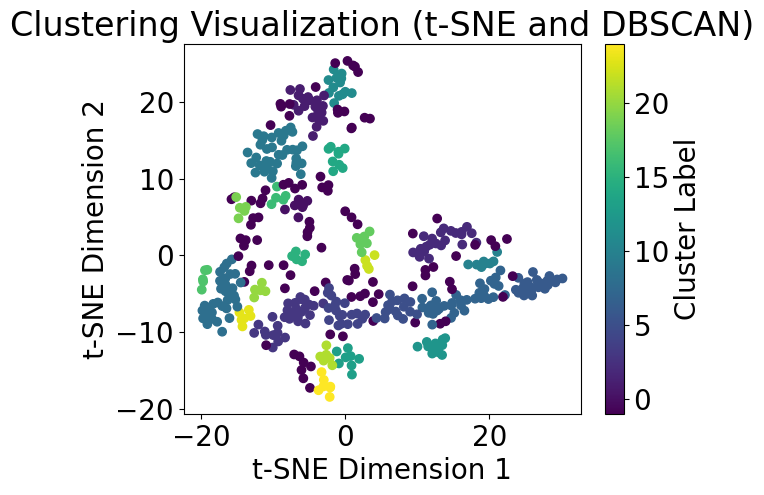

Noise Ratio: 21.82%
Cluster Sizes:
-1     96
 9     36
 7     35
 8     34
 3     30
 6     22
 2     22
 1     20
 4     19
 5     16
 11    13
 12    11
 14     9
 13     8
 10     8
 0      7
 24     7
 18     6
 23     6
 21     6
 15     5
 19     5
 20     5
 17     5
 16     5
 22     4
Name: count, dtype: int64


In [55]:
# t-SNEを用いて次元削減をし、DBSCANを用いてクラスタリングする

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv("/Wholesale customers data.csv")

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

# DBSCANによるクラスタリング
dbscan = DBSCAN(eps=1.5, min_samples=5) # epsとmin_samplesは要調整かも
cluster_labels = dbscan.fit_predict(data_tsne)

# クラスタリング結果の可視化
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Clustering Visualization (t-SNE and DBSCAN)")
plt.colorbar(label="Cluster Label")
plt.show()

# ノイズデータの割合を算出
noise_ratio = (cluster_labels == -1).sum() / len(cluster_labels)
print(f"Noise Ratio: {noise_ratio:.2%}")

# 各クラスタのサイズを算出
cluster_sizes = pd.Series(cluster_labels).value_counts()
print(f"Cluster Sizes:\n{cluster_sizes}")

やはりパラメータのチューニングが必要で、ここではepsとmin_samplesを調整しないとクラスタに分かれなかった。